In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel F <br>
Data required: Population alleles, allele matrices for all peptide classes

In [2]:
categories = ['oncogenes', 'tsgenes', 'random',  'common', 'viral', 'bacterial']
population_names = ['african', 'caribean_indian', 'caucasian', 'filipino', 'japanese', 'mexican', 'middle_eastern']

In [5]:
mutation_counts = pd.DataFrame(pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_mutations.cancer.PHBR.csv', index_col=0).sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)

In [6]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [7]:
alleles_with_affinity = [x[:5]+'*'+x[5:] for x in list(pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/oncogenes_allele_matrix.csv', index_col=0).columns)]
def add_hla(x):
    return 'HLA-' + x
population_types = []
for population in population_names:
    df = pd.read_csv('/cellar/users/ramarty/Projects/hla_new/data/affinities/populations/usa_nmdp_{0}'.format(population),
                sep='\t', index_col=0, header=None)
    df.columns = ['Type', 'Population', 'Nada', 'Percentage', 'Pop_size', 'location']
    df = df.loc[:,['Type', 'Percentage']]
    df.Percentage = df.Percentage / 3
    df['allele'] = df['Type'].apply(add_hla)
    population_types.append(df[(df.Percentage > 0.0) & (df.allele.isin(alleles_with_affinity))])

In [10]:
all_dfs = []
for j, population in enumerate(population_names):
    print j
    pop_dfs = []
    # get the alleles in the population, take the original df and restrict it, then continue as usual
    alleles = list(population_types[j].allele)
    alleles = [x.split('*')[0] + x.split('*')[1] for x in alleles]
    perc_all = []
    for i, category in enumerate(categories):
        if category == 'oncogenes' or category == 'tsgenes':
            # restrict the columns to higher frequency mutations
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
            app_restricted_space = [x for x in driver_mutations if x in df.index]
            df = df.transpose()[app_restricted_space].transpose()
            df = df[[x for x in alleles if x in list(df.columns)]]
            values = get_values_from_df(df)
            print category, len(values), len(df.index)
        else:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
            df = df[[x for x in alleles if x in list(df.columns)]]
            values = get_values_from_df(df)
            print category, len(values), len(df.index)
        total = len(values)
        greater_than_all = len(filter(lambda a: a < 0.5, values))
        perc_all.append(float(greater_than_all)/total)
    binders = pd.DataFrame({'category': categories, 'perc_all': perc_all})
    binders['population'] = population
    all_dfs.append(binders)
df = pd.concat(all_dfs)

0
oncogenes 9500 76
tsgenes 8750 70
random 375000 3000
common 125000 1000
viral 125000 1000
bacterial 125000 1000
1
oncogenes 11476 76
tsgenes 10570 70
random 453000 3000
common 151000 1000
viral 151000 1000
bacterial 151000 1000
2
oncogenes 11932 76
tsgenes 10990 70
random 471000 3000
common 157000 1000
viral 157000 1000
bacterial 157000 1000
3
oncogenes 14516 76
tsgenes 13370 70
random 573000 3000
common 191000 1000
viral 191000 1000
bacterial 191000 1000
4
oncogenes 13148 76
tsgenes 12110 70
random 519000 3000
common 173000 1000
viral 173000 1000
bacterial 173000 1000
5
oncogenes 16492 76
tsgenes 15190 70
random 651000 3000
common 217000 1000
viral 217000 1000
bacterial 217000 1000
6
oncogenes 14440 76
tsgenes 13300 70
random 570000 3000
common 190000 1000
viral 190000 1000
bacterial 190000 1000


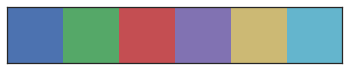

In [19]:
current_palette = sns.color_palette('deep')
sns.set_palette(current_palette)
sns.palplot(current_palette)

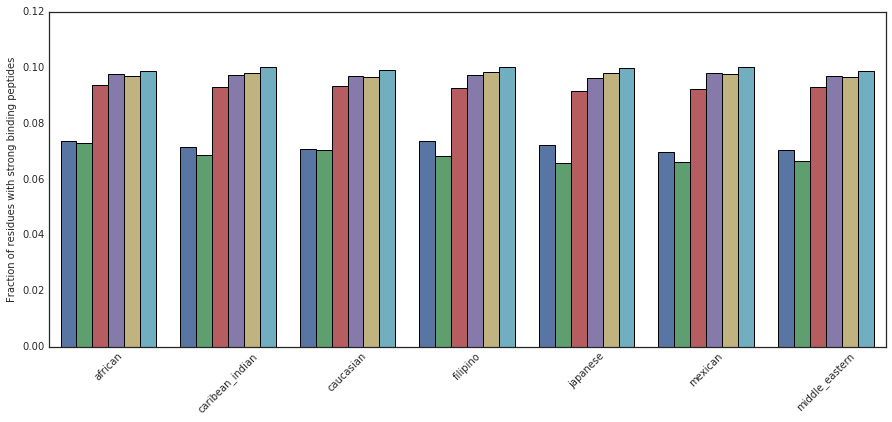

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

sns.barplot(x='population', y='perc_all', hue='category', 
            data=df[df.category.isin(['tsgenes','oncogenes', 'random', 'common', 'bacterial', 'viral'])], ax=ax,
            ci=5)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.ylabel('Fraction of residues with strong binding peptides')
plt.xlabel('')
ax.legend_.remove()

## Panels GJ
Data required: allele matrices for all peptide classes

oncogenes 174648 643 76
tsgenes 160860 602 70
random 6894000
common 2298000
viral 2298000
bacterial 2298000
oncogenes 0.266318537859 0.0757409188768
tsgenes 0.277178913341 0.0720067139127
random 0.310545401799 0.0928677110531
common 0.317127502176 0.0956327241079
viral 0.318932550044 0.0966070496084
bacterial 0.327589208007 0.0973563968668


(0, 0.12)

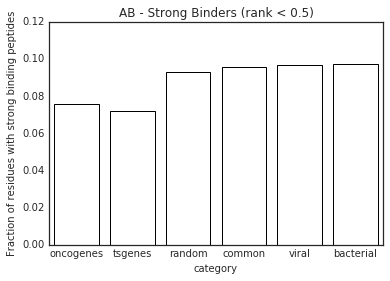

In [21]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/oncogenes_allele_matrix.csv', index_col=0)
AB = [x for x in list(df.columns) if (x[4] == 'A') | (x[4] == 'B')]
categories = ['oncogenes', 'tsgenes', 'random',  'common', 'viral', 'bacterial']
value_types_all = []
for category in categories:
    if category == 'oncogenes' or category == 'tsgenes':
        # restrict the columns to higher frequency mutations
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        #values = get_values_from_df(df)
        values = get_values_from_df(df.transpose()[app_restricted_space].transpose()[AB])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types_all.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
        values = get_values_from_df(df[AB])
        value_types_all.append(values)
        print category, len(values)
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types_all[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types_all[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types_all[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random', 'common', 'viral', 'bacterial'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('AB - Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)

oncogenes 174648 643 76
oncogenes 163158 377 71
tsgenes 160860 602 70
tsgenes 160860 351 70
random 6894000
random 6894000
oncogenes 0.266318537859 0.0757409188768
oncogenes 0.224205984383 0.0601931869721
tsgenes 0.277178913341 0.0720067139127
tsgenes 0.246307348004 0.059138381201
random 0.310545401799 0.0928677110531
random 0.314689149985 0.0939309544531


(0, 0.12)

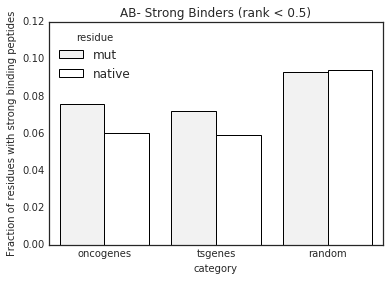

In [9]:
categories = ['oncogenes', 'oncogenes', 'tsgenes', 'tsgenes', 'random', 'random']
statuses = ['mut', 'native', 'mut', 'native', 'mut', 'native']
    
value_types = []
for category, status in zip(categories, statuses):
    if status == 'mut':
        # restrict the columns to higher frequency mutations
        if category == 'oncogenes' or category == 'tsgenes':
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
            app_restricted_space = [x for x in driver_mutations if x in df.index]
            values = get_values_from_df(df[AB].transpose()[app_restricted_space].transpose())
            print category, len(values), len(df.index), len(app_restricted_space)
            value_types.append(values)
        else:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
            values = get_values_from_df(df[AB])
            value_types.append(values)
            print category, len(values)
    else:
        # restrict the columns to higher frequency mutations
        if category == 'oncogenes' or category == 'tsgenes':
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.native.csv'.format(category), index_col=0)
            app_restricted_space = [x for x in driver_mutations if x in df.index]
            values = get_values_from_df(df[AB].transpose()[app_restricted_space].transpose())
            print category, len(values), len(df.index), len(app_restricted_space)
            value_types.append(values)
        else:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.native.csv'.format(category), index_col=0)
            values = get_values_from_df(df[AB])
            value_types.append(values)
            print category, len(values)
    
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'residue': statuses, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', hue='residue', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('AB- Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)

## Panels HK
Data required: allele matrices for all peptide classes

oncogenes 1880132
tsgenes 1760248
random 8772000
common 2924000
viral 2924000
bacterial 2924000
oncogenes 0.315602840652 0.0908420259854
tsgenes 0.321903504506 0.0941236689376
random 0.317438554492 0.0936664386685
common 0.325530437756 0.0964914500684
viral 0.330242818057 0.0985441176471
bacterial 0.337079685363 0.0993201094391


(0, 0.12)

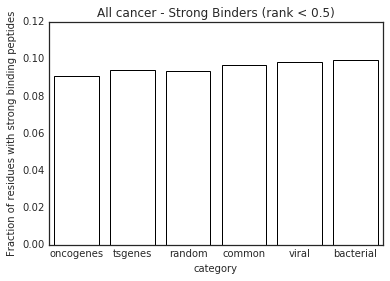

In [10]:
categories = ['oncogenes', 'tsgenes', 'random',  'common', 'viral', 'bacterial']
value_types_all = []
for category in categories:
    df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
    values = get_values_from_df(df)
    value_types_all.append(values)
    print category, len(values)
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types_all[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types_all[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types_all[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random', 'common', 'viral', 'bacterial'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('All cancer - Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)

oncogenes 1880132
oncogenes 1102348
tsgenes 1760248
tsgenes 1026324
random 8772000
random 8772000
oncogenes 0.315602840652 0.0908420259854
oncogenes 0.280206432089 0.0787736721979
tsgenes 0.321903504506 0.0941236689376
tsgenes 0.305513658455 0.0863148479428
random 0.317438554492 0.0936664386685
random 0.322212836297 0.0950891472868


(0, 0.12)

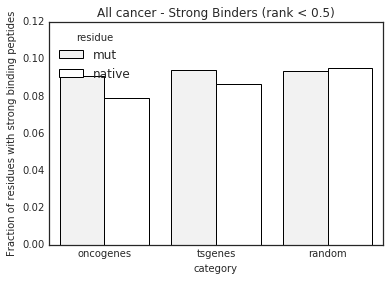

In [11]:
categories = ['oncogenes', 'oncogenes', 'tsgenes', 'tsgenes', 'random', 'random']
statuses = ['mut', 'native', 'mut', 'native', 'mut', 'native']
    
value_types = []
for category, status in zip(categories, statuses):
    if status == 'mut':
        # restrict the columns to higher frequency mutations
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.csv'.format(category), index_col=0)
        values = get_values_from_df(df)
        print category, len(values)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.native.csv'.format(category), index_col=0)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df)
        print category, len(values)
        value_types.append(values)
    
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'residue': statuses, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', hue='residue', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('All cancer - Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)

## Panels IL
Data required: allele matrices for exclusively 9-mers

oncogenes 222224 643 76
tsgenes 204680 602 70
random 8772000
common 2924000
viral 2924000
bacterial 2924000
oncogenes 0.186613507092 0.0551875584995
tsgenes 0.218966191128 0.0499658002736
random 0.242079913361 0.0702497720018
common 0.241722640219 0.0710437756498
viral 0.23772127223 0.0686538987688
bacterial 0.235698016416 0.0688084815321


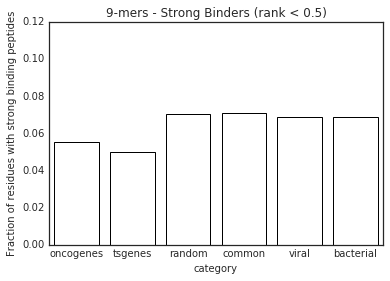

In [22]:
categories = ['oncogenes', 'tsgenes', 'random',  'common', 'viral', 'bacterial']
value_types_all = []
for category in categories:
    if category == 'oncogenes' or category == 'tsgenes':
        # restrict the columns to higher frequency mutations
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.9.csv'.format(category), index_col=0)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.transpose()[app_restricted_space].transpose())
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types_all.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.9.csv'.format(category), index_col=0)
        values = get_values_from_df(df)
        value_types_all.append(values)
        print category, len(values)
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types_all[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types_all[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types_all[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random', 'common', 'viral', 'bacterial'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('9-mers - Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)
plt.savefig('/cellar/users/ramarty/Data/hla/git_data/figures/fraction_strong.9.pdf')

oncogenes 222224 643 76
oncogenes 222224 643 76
tsgenes 204680 602 70
tsgenes 204680 602 70
random 8772000
random 8772000
oncogenes 0.186613507092 0.0551875584995
oncogenes 0.15817373461 0.0450716394269
tsgenes 0.218966191128 0.0499658002736
tsgenes 0.192774086379 0.0420705491499
random 0.242079913361 0.0702497720018
random 0.240062585499 0.0695943912449


(0, 0.12)

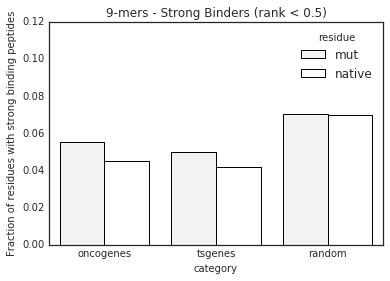

In [13]:
categories = ['oncogenes', 'oncogenes', 'tsgenes', 'tsgenes', 'random', 'random']
statuses = ['mut', 'native', 'mut', 'native', 'mut', 'native']
    
value_types = []
for category, status in zip(categories, statuses):
    if status == 'mut':
        # restrict the columns to higher frequency mutations
        if category == 'oncogenes' or category == 'tsgenes':
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.9.csv'.format(category), index_col=0)
            app_restricted_space = [x for x in driver_mutations if x in df.index]
            values = get_values_from_df(df.transpose()[app_restricted_space].transpose())
            print category, len(values), len(df.index), len(app_restricted_space)
            value_types.append(values)
        else:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.9.csv'.format(category), index_col=0)
            values = get_values_from_df(df)
            value_types.append(values)
            print category, len(values)
    else:
        # restrict the columns to higher frequency mutations
        if category == 'oncogenes' or category == 'tsgenes':
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.native.9.csv'.format(category), index_col=0)
            app_restricted_space = [x for x in driver_mutations if x in df.index]
            values = get_values_from_df(df.transpose()[app_restricted_space].transpose())
            print category, len(values), len(df.index), len(app_restricted_space)
            value_types.append(values)
        else:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/{0}_allele_matrix.native.9.csv'.format(category), index_col=0)
            values = get_values_from_df(df)
            value_types.append(values)
            print category, len(values)
    
perc_strong, perc_all = [], []
for i, category in enumerate(categories):
    total = len(value_types[i])
    greater_than_strong = len(filter(lambda a: a < 0.5, value_types[i]))
    greater_than_all = len(filter(lambda a: a < 2, value_types[i]))
    print category, float(greater_than_all)/total, float(greater_than_strong)/total
    perc_all.append(float(greater_than_all)/total)
    perc_strong.append(float(greater_than_strong)/total)
binders = pd.DataFrame({'category': categories, 'residue': statuses, 'Perc_strong': perc_strong, 'Perc_all': perc_all})
sns.barplot(x='category', y='Perc_strong', hue='residue', data=binders, color='white', order=['oncogenes', 'tsgenes', 'random'])
plt.ylabel('Fraction of residues with strong binding peptides')
plt.title('9-mers - Strong Binders (rank < 0.5)')
plt.ylim(0, 0.12)